# Day 11: Octopusea
The input for this problem is located at https://adventofcode.com/2021/day/11/input

In [1]:
from itertools import count

import matplotlib.pyplot as plt
import numpy as np

Load the problem

In [2]:
energy = np.genfromtxt("input.txt", delimiter=1, dtype=np.uint64)

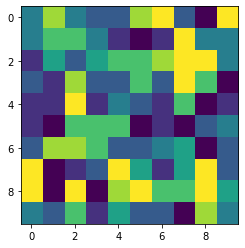

In [3]:
plt.imshow(energy);

## Part 1

In [4]:
GRID_NEIGHBOURS = np.array(
    [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]
)


def neighbours(i, j, grid):
    for (u, v) in GRID_NEIGHBOURS + [i, j]:
        if not (0 <= u < grid.shape[0] and 0 <= v < grid.shape[1]):
            continue
        yield u, v

In [5]:
def step(energy):
    # Increment Energy
    energy += 1

    # Determine the number of flashes
    flashes = np.where(energy > 9)

    # Add seeds to open set
    open = set()
    open.update(zip(*flashes))

    # Use closed grid
    closed = np.zeros(energy.shape, dtype=np.bool_)

    while open:
        ix = open.pop()
        if closed[ix]:
            continue

        closed[ix] = True

        for jx in neighbours(ix[0], ix[1], energy):
            energy[jx] += 1
            if energy[jx] > 9:
                open.add(jx)

    energy[closed] = 0

    return closed.sum()

In [6]:
flashes_per_step = [step(energy) for _ in range(100)]
sum(flashes_per_step)

1741

## Part 2

In [7]:
for i in count():
    n_flashes = step(energy)
    if n_flashes == energy.size:
        break
len(flashes_per_step) + i + 1

440